In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('test task data.csv')
df

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...
15280,ffeef2252b1e6f9084eb9eefdb72461b,2023-06-04,AU,control,1,0,monthly.5.99.3d.trial,0.0
15281,ffef2243e364f6d53cf5bee90473a4d7,2023-06-06,CA,treatment,0,0,NaN,0.0
15282,fff046eac6fd5329dd1fe44ad5e162cb,2023-06-07,US,treatment,0,0,NaN,0.0
15283,fff32685daea5e16da8f1243f40467a0,2023-06-01,GB,treatment,0,0,NaN,0.0


In [66]:
#Зчитай дані з файлу та виведи інформацію про результати A/B тесту:

#Кількість користувачів в групах 'control' та 'treatment' відповідно;
#Кількість конверсій в групах 'control' та 'treatment' відповідно;
#Рівень конверсії в групах 'control' та 'treatment' відповідно;
#Дату початку та дату кінця тесту, а також тривалість тесту в днях.

df['install_date'] = pd.to_datetime(df['install_date'])
print('sample size: control - {}, treatment - {}'.format(*df.groupby('test_group').size()))
print('conversions_trial: control - {}, treatment - {}'.format(*df[df['trial']==1].groupby('test_group').size()))
print('conversion rate_trial:  control - {}, treatment - {}'.format(*(df.groupby('test_group')['trial'].mean()*100).round(2)))
print('conversions_paid: control - {}, treatment - {}'.format(*df[df['paid']==1].groupby('test_group').size()))
print('conversion rate_paid:  control - {}, treatment - {}'.format(*(df.groupby('test_group')['paid'].mean()*100).round(2)))
print(f"date start: {df['install_date'].dt.date.astype(str).min()}")
print(f"date finish: {df['install_date'].dt.date.astype(str).max()}")
print(f"test duration: {(df['install_date'].dt.date.max() - df['install_date'].dt.date.min()).days}")

sample size: control - 7627, treatment - 7658
conversions_trial: control - 925, treatment - 798
conversion rate_trial:  control - 12.13, treatment - 10.42
conversions_paid: control - 116, treatment - 149
conversion rate_paid:  control - 1.52, treatment - 1.95
date start: 2023-06-01
date finish: 2023-06-07
test duration: 6


In [57]:
df.groupby(['test_group', 'country']).describe()

install_date                                 \
                          count                           mean   
test_group country                                               
control    AU              1928  2023-06-04 01:34:06.473028864   
           CA              1936  2023-06-04 01:25:32.231405056   
           GB              1846  2023-06-04 01:45:18.526543872   
           US              1917  2023-06-04 02:15:57.746478848   
treatment  AU              1835  2023-06-04 01:55:21.416893440   
           CA              1959  2023-06-03 23:13:41.439509760   
           GB              1991  2023-06-04 00:13:01.115017728   
           US              1873  2023-06-03 23:52:18.707955200   

                                                              \
                                    min                  25%   
test_group country                                             
control    AU       2023-06-01 00:00:00  2023-06-02 00:00:00   
           CA       2023-06-01 00:00:00  2023-06-02 00:00:00   
           GB       2023-06-01 00:00:00  2023-06-02 00:00:00   
           US       2023-06-01 00:00:00  2023-06-02 00:00:00   
treatment  AU       2023-06-01 00:00:00  2023-06-02 00:00:00   
           CA       2023-06-01 00:00:00  2023-06-02 00:00:00   
           GB       2023-06-01 00:00:00  2023-06-02 00:00:00   
           US       2023-06-01 00:00:00  2023-06-02 00:00:00   

                                                              \
                                    50%                  75%   
test_group country                                             
control    AU       2023-06-04 00:00:00  2023-06-06 00:00:00   
           CA       2023-06-04 00:00:00  2023-06-06 00:00:00   
           GB       2023-06-04 00:00:00  2023-06-06 00:00:00   
           US       2023-06-04 00:00:00  2023-06-06 00:00:00   
treatment  AU       2023-06-04 00:00:00  2023-06-06 00:00:00   
           CA       2023-06-04 00:00:00  2023-06-06 00:00:00   
           GB       2023-06-04 00:00:00  2023-06-06 00:00:00   
           US       2023-06-04 00:00:00  2023-06-06 00:00:00   

                                               trial            ... paid  \
                                    max  std   count      mean  ...  max   
test_group country                                              ...        
control    AU       2023-06-07 00:00:00  NaN  1928.0  0.118257  ...  1.0   
           CA       2023-06-07 00:00:00  NaN  1936.0  0.113120  ...  1.0   
           GB       2023-06-07 00:00:00  NaN  1846.0  0.146262  ...  1.0   
           US       2023-06-07 00:00:00  NaN  1917.0  0.108503  ...  1.0   
treatment  AU       2023-06-07 00:00:00  NaN  1835.0  0.104087  ...  1.0   
           CA       2023-06-07 00:00:00  NaN  1959.0  0.106177  ...  1.0   
           GB       2023-06-07 00:00:00  NaN  1991.0  0.104972  ...  1.0   
           US       2023-06-07 00:00:00  NaN  1873.0  0.101442  ...  1.0   

                             revenue_1m                                       \
                         std      count      mean  min  25%  50%  75%    max   
test_group country                                                             
control    AU       0.123798     1928.0  0.093205  0.0  0.0  0.0  0.0   5.99   
           CA       0.095999     1936.0  0.055692  0.0  0.0  0.0  0.0   5.99   
           GB       0.136420     1846.0  0.113570  0.0  0.0  0.0  0.0   5.99   
           US       0.130103     1917.0  0.103114  0.0  0.0  0.0  0.0   5.99   
treatment  AU       0.144267     1835.0  0.114060  0.0  0.0  0.0  0.0  11.96   
           CA       0.136161     1959.0  0.094630  0.0  0.0  0.0  0.0  11.96   
           GB       0.142052     1991.0  0.111130  0.0  0.0  0.0  0.0  11.96   
           US       0.129622     1873.0  0.094186  0.0  0.0  0.0  0.0  11.96   

                              
                         std  
test_group country            
control    AU       0.741551  
           CA       0.575035  
         

In [59]:
# Виводимо конверсію для тріал по країнах
df[df['trial']==1].groupby(['test_group', 'country']).size()

test_group  country
control     AU         228
            CA         219
            GB         270
            US         208
treatment   AU         191
            CA         208
            GB         209
            US         190
dtype: int64

In [60]:
# Виводимо конверсію для пейд по країнах
df[df['paid']==1].groupby(['test_group', 'country']).size()

test_group  country
control     AU         30
            CA         18
            GB         35
            US         33
treatment   AU         39
            CA         37
            GB         41
            US         32
dtype: int64

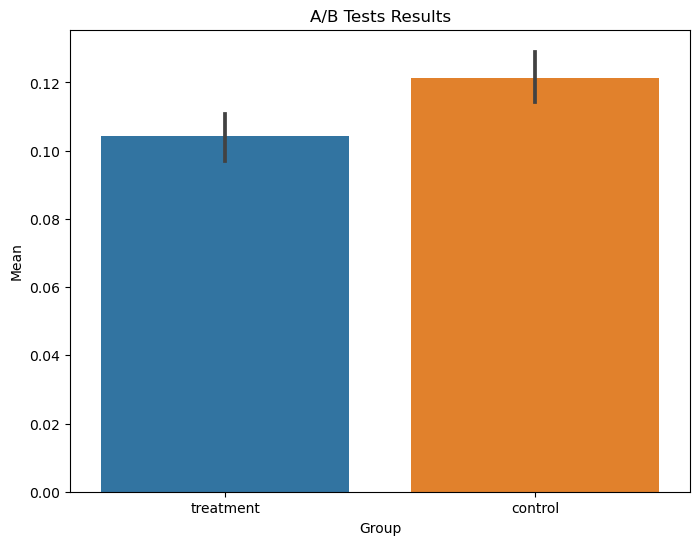

In [61]:
#Побудуй візуалізацію для порівняння середніх значень у групах з 95% довірчими інтервалами для тріал
plt.figure(figsize=(8,6))
barplot = sns.barplot(x=df['test_group'], y=df['trial'],errorbar=('ci', 95))
plt.title ('A/B Tests Results')
plt.xlabel('Group')
plt.ylabel('Mean')
plt.show()

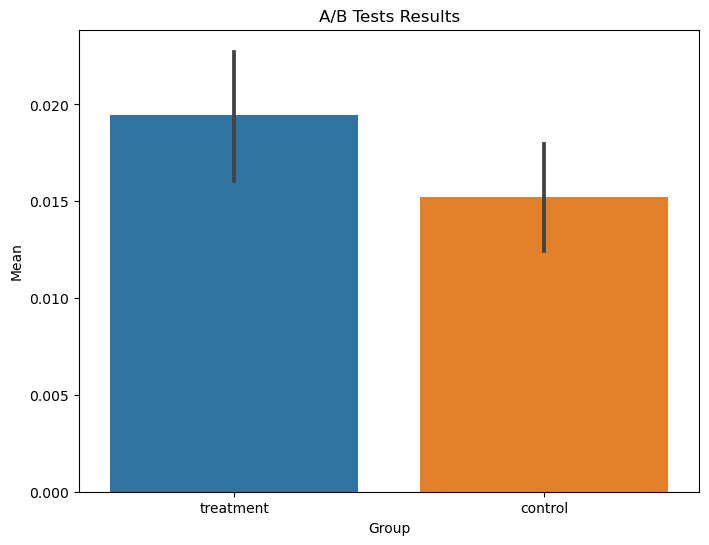

In [62]:
#Побудуй візуалізацію для порівняння середніх значень у групах з 95% довірчими інтервалами для пейд
plt.figure(figsize=(8,6))
barplot = sns.barplot(x=df['test_group'], y=df['paid'],errorbar=('ci', 95))
plt.title ('A/B Tests Results')
plt.xlabel('Group')
plt.ylabel('Mean')
plt.show()

In [64]:
# Тестування по критерію Ст'юдента для тріал
from scipy import stats
alpha = 0.05

statistic, pvalue = stats.ttest_ind(df[df['test_group'] == 'treatment']['trial'],
                                    df[df['test_group'] == 'control']['trial'],
                                    alternative='less')

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected')

t-statistic: -3.34, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected


In [65]:
# Тестування по критерію Ст'юдента для пейд
alpha = 0.05

statistic, pvalue = stats.ttest_ind(df[df['test_group'] == 'treatment']['paid'],
                                    df[df['test_group'] == 'control']['paid'],
                                    alternative='less')

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected')

t-statistic: 2.01, p-value: 0.98
The difference is insignificant, Null Hypothesis cannot rejected
